In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['GLA', 'BGC']
patterns1= ['GLA(*_*_)]-BGC(*_*_)', 'GLA(*_*_)-BGC(*_*_)','GLA(*_*_)]-[*]-BGC(*_*_)', 'GLA(*_*_)-[*]-BGC(*_*_)']
patterns2= ['DGalpa1-6DGlcpb', 'DGalpa1-6]DGlcpb', 'DGalpa1-6[*]DGlcpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 11 
valid torsion1 and torsion2: (11, 11)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['2.M', '1.M'], ['4C1', '4C1'])
(['2.J', '1.J'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['2.O', '1.O'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.K', '1.K'], ['4C1', '4C1'])
(['2.L', '1.L'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//2zmn.pdb M GLA 2 C1
../../pdbs//2zmn.pdb M BGC 1 O6
7548 7547
Connection found between 7548 and 7547
../../pdbs//2zmn.pdb J GLA 2 C1
../../pdbs//2zmn.pdb J BGC 1 O6
7448 7447
Connection found between 7448 and 7447
../../pdbs//2zmn.pdb G GLA 2 C1
../../pdbs//2zmn.pdb G BGC 1 O6
7363 7362
Connection found between 7363 and 7362
../../pdbs//2zmn.pdb O GLA 2 C1
../../pdbs//2zmn.pdb O BGC 1 O6
7609 7608
Connection found between 7609 and 7608
../../pdbs//2dvg.pdb E GLA 2 C1
../../pdbs//2dvg.pdb E BGC 1 O6
6989 6988
Connection found between 6989 and 6988
../../pdbs//1ugy.pdb K GLA 2 C1
../../pdbs//1ugy.pdb K BGC 1 O6
4675 4674
Connection found between 4675 and 4674
../../pdbs//1ugy.pdb L GLA 2 C1
../../pdbs//1ugy.pdb L BGC 1 O6
4698 4697
Connection found between 4698 and 4697
../../pdbs//2zx3.pdb F GLA 2 C1
../../pdbs//2zx3.pdb F BGC 1 O6
3111 3110
Connection found between 3111 and 3110
../../pdbs//2zx3.pdb E GLA 2 C1
../../pdbs//2zx3.pdb E BGC 1 O6
3088 3087
Connection found betwe

In [13]:
output_df.to_csv('DGalpa1-6DGlcpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGalpa1-6DGlcpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,2zmn.pdb,M GLA 2 C2 C1 BGC 1 O6 C6,M GLA 2 C1 BGC 1 O6 C6 C5,173.8650,220.0490,"([GLA(2_M_), BGC(1_M_)], [53.64, 52.75])",GLA(2_M_)-BGC(1_M_),DGalpa1-6DGlcpb1-ROH,"([2.M, 1.M], [4C1, 4C1])"
1,2zmn.pdb,J GLA 2 C2 C1 BGC 1 O6 C6,J GLA 2 C1 BGC 1 O6 C6 C5,157.1640,203.3930,"([GLA(2_J_), BGC(1_J_)], [31.33, 33.84])",GLA(2_J_)-BGC(1_J_),DGalpa1-6DGlcpb1-ROH,"([2.J, 1.J], [4C1, 4C1])"
2,2zmn.pdb,G GLA 2 C2 C1 BGC 1 O6 C6,G GLA 2 C1 BGC 1 O6 C6 C5,177.4840,175.1650,"([GLA(2_G_), BGC(1_G_)], [44.13, 57.65])",GLA(2_G_)-BGC(1_G_),DGalpa1-6DGlcpb1-ROH,"([2.G, 1.G], [4C1, 4C1])"
3,2zmn.pdb,O GLA 2 C2 C1 BGC 1 O6 C6,O GLA 2 C1 BGC 1 O6 C6 C5,190.5160,192.9570,"([GLA(2_O_), BGC(1_O_)], [59.13, 62.63])",GLA(2_O_)-BGC(1_O_),DGalpa1-6DGlcpb1-ROH,"([2.O, 1.O], [4C1, 4C1])"
4,2dvg.pdb,E GLA 2 C2 C1 BGC 1 O6 C6,E GLA 2 C1 BGC 1 O6 C6 C5,280.3217,263.7647,"([GLA(2_E_), BGC(1_E_)], [33.59, 79.21])",GLA(2_E_)-BGC(1_E_),DGalpa1-6DGlcpb1-ROH,"([2.E, 1.E], [4C1, 4C1])"
5,1ugy.pdb,K GLA 2 C2 C1 BGC 1 O6 C6,K GLA 2 C1 BGC 1 O6 C6 C5,179.7090,118.1970,"([GLA(2_K_), BGC(1_K_)], [35.84, 57.56])",GLA(2_K_)-BGC(1_K_),DGalpa1-6DGlcpb1-ROH,"([2.K, 1.K], [4C1, 4C1])"
6,1ugy.pdb,L GLA 2 C2 C1 BGC 1 O6 C6,L GLA 2 C1 BGC 1 O6 C6 C5,159.4570,130.1140,"([GLA(2_L_), BGC(1_L_)], [43.59, 73.81])",GLA(2_L_)-BGC(1_L_),DGalpa1-6DGlcpb1-ROH,"([2.L, 1.L], [4C1, 4C1])"
7,2zx3.pdb,F GLA 2 C2 C1 BGC 1 O6 C6,F GLA 2 C1 BGC 1 O6 C6 C5,188.7470,190.5490,"([GLA(2_F_), BGC(1_F_)], [23.91, 36.17])",GLA(2_F_)-BGC(1_F_),DGalpa1-6DGlcpb1-ROH,"([2.F, 1.F], [4C1, 4C1])"
8,2zx3.pdb,E GLA 2 C2 C1 BGC 1 O6 C6,E GLA 2 C1 BGC 1 O6 C6 C5,188.4470,191.8340,"([GLA(2_E_), BGC(1_E_)], [19.1, 31.89])",GLA(2_E_)-BGC(1_E_),DGalpa1-6DGlcpb1-ROH,"([2.E, 1.E], [4C1, 4C1])"
9,2zx3.pdb,D GLA 2 C2 C1 BGC 1 O6 C6,D GLA 2 C1 BGC 1 O6 C6 C5,169.9870,199.8070,"([GLA(2_D_), BGC(1_D_)], [18.21, 32.82])",GLA(2_D_)-BGC(1_D_),DGalpa1-6DGlcpb1-ROH,"([2.D, 1.D], [4C1, 4C1])"


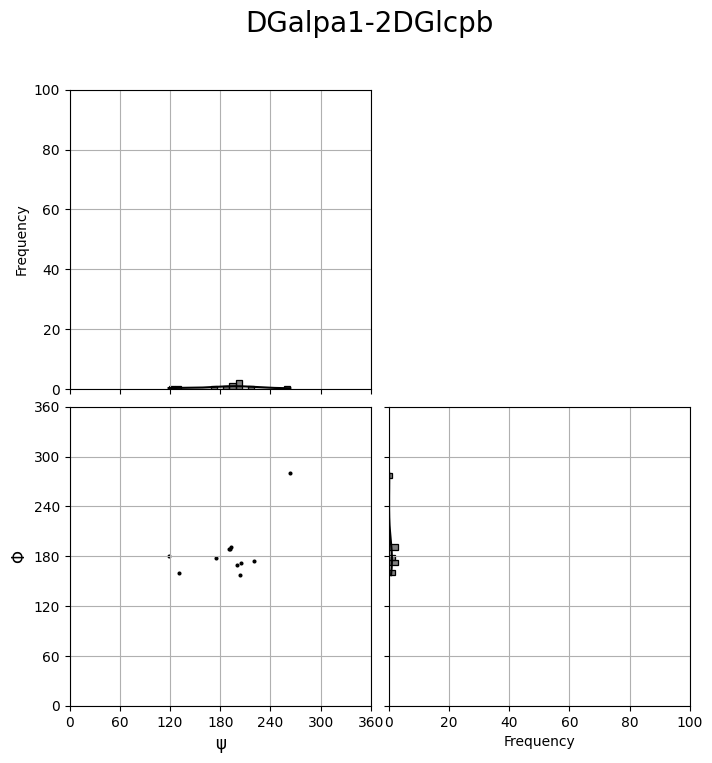

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGalpa1-6DGlcpb',max_histogram_scale=100,step_histogram_tick=20)